In [1]:
import pandas as pd
import pygwalker as pyg
import pathlib
import numpy as np
from ydata_profiling import ProfileReport
from tools.dataset import get_dataset
from IPython.display import display, Markdown, Latex
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000 # avoid matplotlib overflow error
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '11'
import sweetviz
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("all-results-trimed.xlsx")

In [3]:
df.head()

,Duration,Duration Seconds,dataset,extra_feat,feature_count,model,total size,test_size,time_period_sec_txt,time_period_test_txt,time_period_train_txt,train_size,test_mae,test_mape,test_mse,test_rmse,train_mae,train_mape,train_mse,train_rmse
0,13.6min,816.0,livestock_meat_import,False,5,tabnet,237165,47433,12691 days 00:00:00,2495 days 00:00:00,10196 days 00:00:00,189732,878282.656787,9.736134e+02,5.206301e+12,2.281732e+06,1.549047e+06,9.802483e+02,5.708591e+13,7.555522e+06
1,11.4min,684.0,livestock_meat_import,False,5,ssl+tabnet,237165,47433,12691 days 00:00:00,2495 days 00:00:00,10196 days 00:00:00,189732,771421.501378,1.230842e+02,6.015429e+12,2.452637e+06,1.449515e+06,1.185925e+02,6.346991e+13,7.966800e+06
2,42.1min,2526.0,future_sales,False,7,tabnet,2935849,587170,1033 days 00:00:00,298 days 00:00:00,735 days 00:00:00,2348679,0.410407,2.389662e-01,1.872326e+01,4.327038e+00,3.706080e-01,2.156763e-01,3.481449e+00,1.865864e+00
3,2.6h,9360.0,future_sales,False,7,ssl+tabnet,2935849,587170,1033 days 00:00:00,298 days 00:00:00,735 days 00:00:00,2348679,0.429454,2.477705e-01,1.887979e+01,4.345088e+00,4.170997e-01,2.499798e-01,3.798161e+00,1.948887e+00
4,26.6min,1596.0,product_demand,False,7,tabnet,1037336,207468,2193 days 00:00:00,410 days 00:00:00,1783 days 00:00:00,829868,6150.640694,2.413361e+17,8.178646e+08,2.859833e+04,5.908238e+03,3.407598e+17,7.440833e+08,2.727789e+04


In [21]:
df.pivot_table?

Signature:
df.pivot_table(
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins: 'bool' = False,
    dropna: 'bool' = True,
    margins_name: 'Level' = 'All',
    observed: 'bool' = False,
    sort: 'bool' = True,
) -> 'DataFrame'
Docstring:
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects
(hierarchical indexes) on the index and columns of the result DataFrame.

Parameters
----------
values : list-like or scalar, optional
    Column or columns to aggregate.
index : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table index.  If an array is passed,
    it is being used as the same manner as column values.
columns : column, Grouper, array, or list of the previous
    If an array is pass

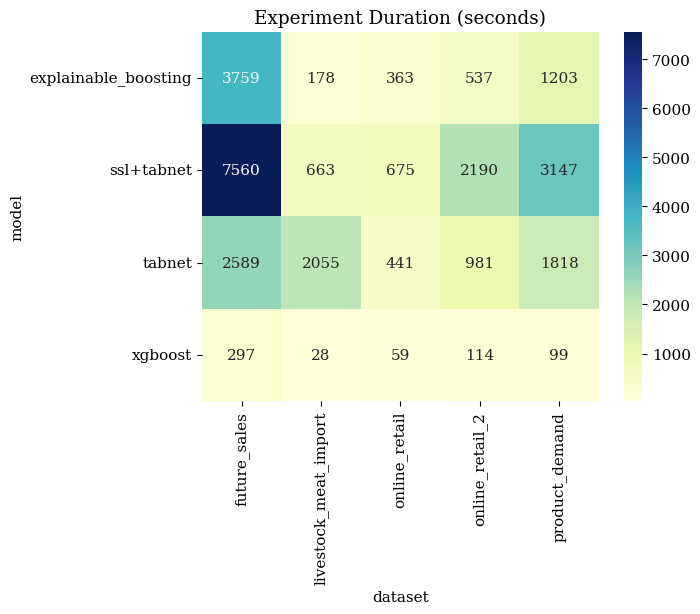

In [26]:
plt.title("Experiment Duration (seconds)")
sns.heatmap(df.pivot_table(index="model", columns="dataset", values="Duration Seconds", aggfunc="mean"), cmap="YlGnBu", annot=True, fmt="0.0f")
plt.show()

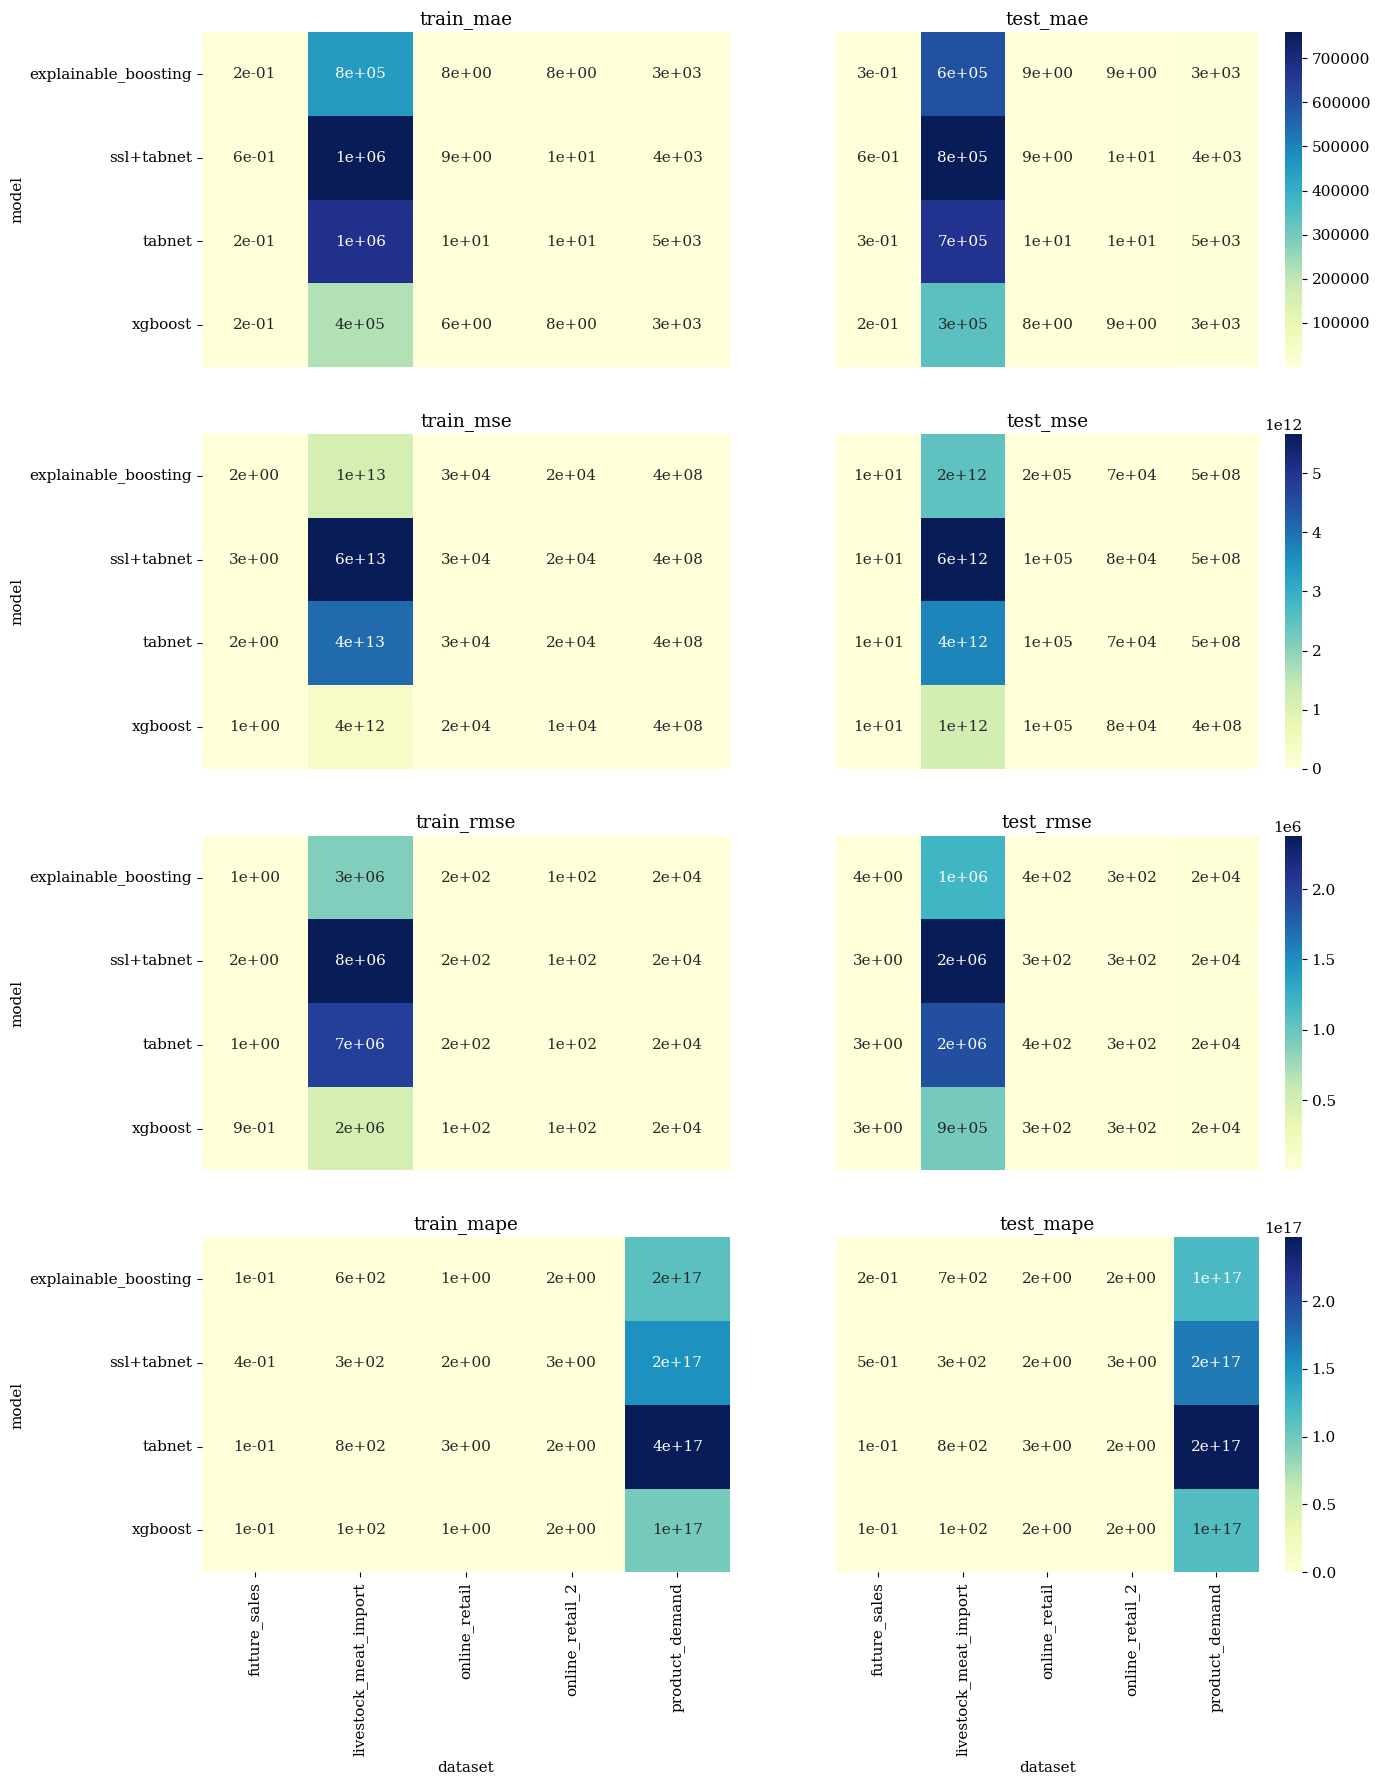

In [70]:
metrics_pair = [
    ["test_mae", "train_mae", 1], ["test_mse", "train_mse", 1], ["test_rmse", "train_rmse", 1], ["test_mape", "train_mape", 1]
]
df2 = df.copy()
idx = 1
plt.figure(figsize=(15, 20))
for metrcs in metrics_pair:
    b, a, step = metrcs
    df2[a] = df2[a] / step
    df2[b] = df2[b] / step
    ax = plt.subplot(4,2,idx)
    ax.set_title(f"{a}")
    sns.heatmap(df.pivot_table(index="model", columns="dataset", values=a, aggfunc="mean"), cmap="YlGnBu", annot=True, fmt="0.0e", ax=ax, cbar=False)
    if idx != 7:
        ax.set_xlabel("")
        ax.set_xticks([])
    
    ax = plt.subplot(4,2, idx+1)
    ax.set_title(f"{b}")
    sns.heatmap(df.pivot_table(index="model", columns="dataset", values=b, aggfunc="mean"), cmap="YlGnBu", annot=True, fmt="0.0e", ax=ax)
    ax.set_yticks([])
    ax.set_ylabel("")
    if idx != 7:
        ax.set_xlabel("")
        ax.set_xticks([])
    idx += 2
plt.savefig("heatmap-errors.png")
plt.show()

In [4]:
pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-0006199a33deb49fexubmG8pT2OgqAzL" style="height: auto">\n    <head>…

In [5]:
# pyg.walk(df)
path = r"/Users/soumensardar/Library/CloudStorage/GoogleDrive-soumensardarintmain@gmail.com/.shortcut-targets-by-id/1zlA8VX-l_IufCZSfJIfxohpsEGrcLx4-/Taniya Paul Thesis paper/writing/Figures and Charts"

In [6]:
datasets = df['dataset'].unique()
models = df['model'].unique()
datasets

array(['livestock_meat_import', 'future_sales', 'product_demand',
       'online_retail_2', 'online_retail'], dtype=object)

In [7]:
metrics_pair = [
    ["test_mae", "train_mae"], ["test_mse", "train_mse"], ["test_mape", "train_mape"], ["train_rmse", "test_rmse"]
]

In [8]:
df["feature_count_category"] = df["feature_count"].apply(lambda x: "<=10" if x <= 10 else ">10")
df.head()

,Duration,Duration Seconds,dataset,extra_feat,feature_count,model,total size,test_size,time_period_sec_txt,time_period_test_txt,...,train_size,test_mae,test_mape,test_mse,test_rmse,train_mae,train_mape,train_mse,train_rmse,feature_count_category
0,13.6min,816.0,livestock_meat_import,False,5,tabnet,237165,47433,12691 days 00:00:00,2495 days 00:00:00,...,189732,878282.656787,9.736134e+02,5.206301e+12,2.281732e+06,1.549047e+06,9.802483e+02,5.708591e+13,7.555522e+06,<=10
1,11.4min,684.0,livestock_meat_import,False,5,ssl+tabnet,237165,47433,12691 days 00:00:00,2495 days 00:00:00,...,189732,771421.501378,1.230842e+02,6.015429e+12,2.452637e+06,1.449515e+06,1.185925e+02,6.346991e+13,7.966800e+06,<=10
2,42.1min,2526.0,future_sales,False,7,tabnet,2935849,587170,1033 days 00:00:00,298 days 00:00:00,...,2348679,0.410407,2.389662e-01,1.872326e+01,4.327038e+00,3.706080e-01,2.156763e-01,3.481449e+00,1.865864e+00,<=10
3,2.6h,9360.0,future_sales,False,7,ssl+tabnet,2935849,587170,1033 days 00:00:00,298 days 00:00:00,...,2348679,0.429454,2.477705e-01,1.887979e+01,4.345088e+00,4.170997e-01,2.499798e-01,3.798161e+00,1.948887e+00,<=10
4,26.6min,1596.0,product_demand,False,7,tabnet,1037336,207468,2193 days 00:00:00,410 days 00:00:00,...,829868,6150.640694,2.413361e+17,8.178646e+08,2.859833e+04,5.908238e+03,3.407598e+17,7.440833e+08,2.727789e+04,<=10


/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/163414886.py:13: UserWarning: The sizes list has more values (2) than needed (1), which may not be intended.
  g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category",
/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/163414886.py:13: UserWarning: The sizes list has more values (2) than needed (1), which may not be intended.
  g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category",
/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/163414886.py:13: UserWarning: The sizes list has more values (2) than needed (1), which may not be intended.
  g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category",
/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/163414886.py:13: UserWarning

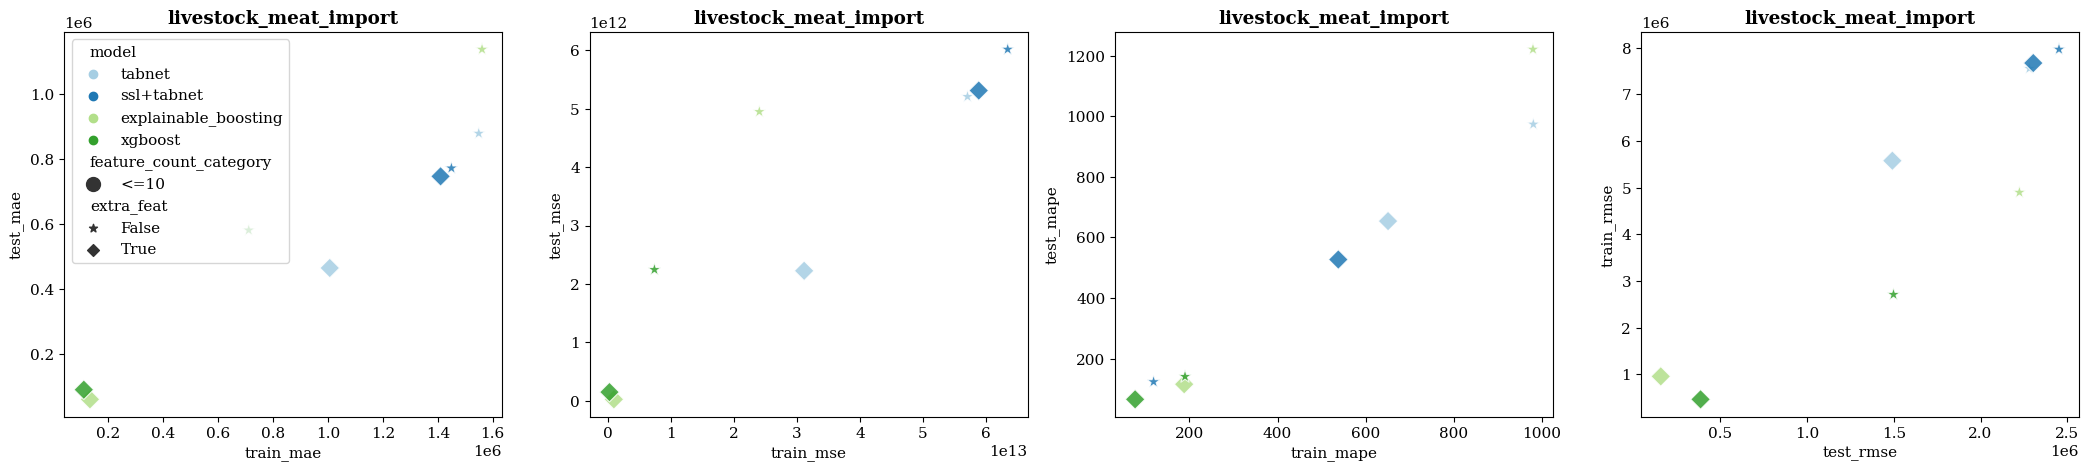

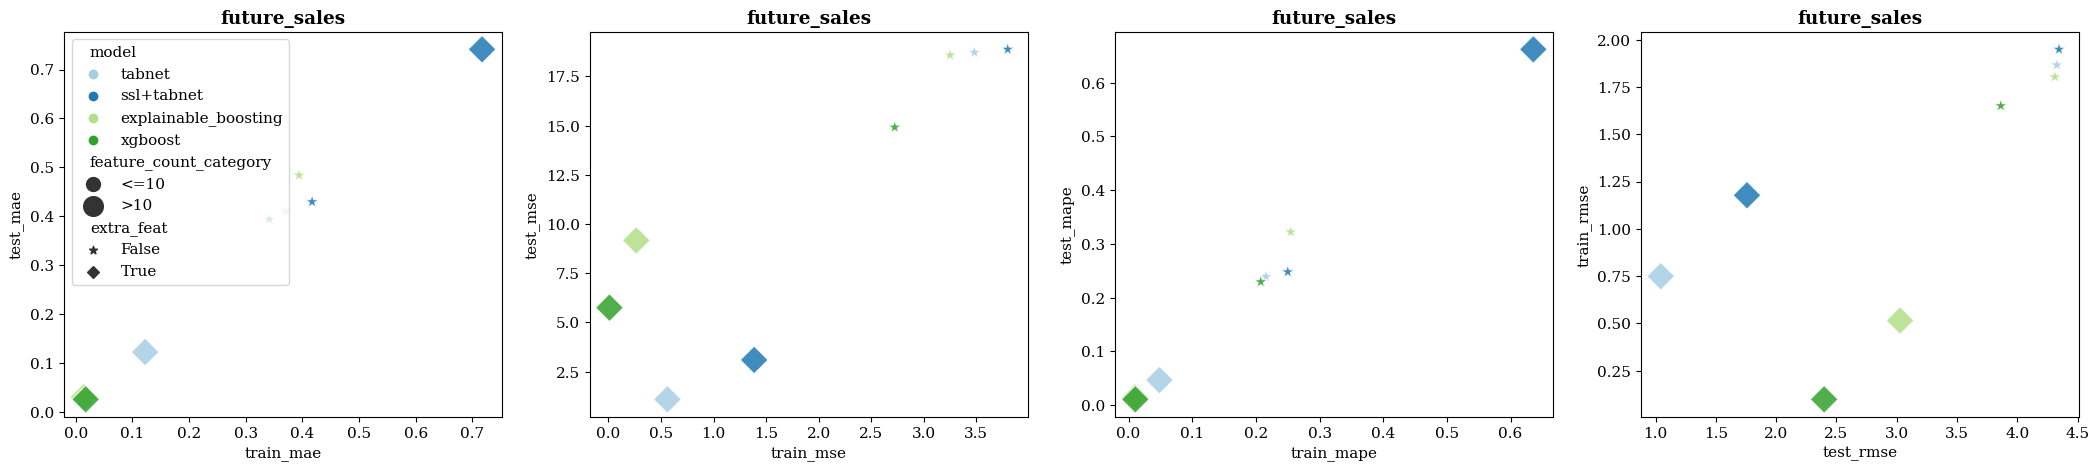

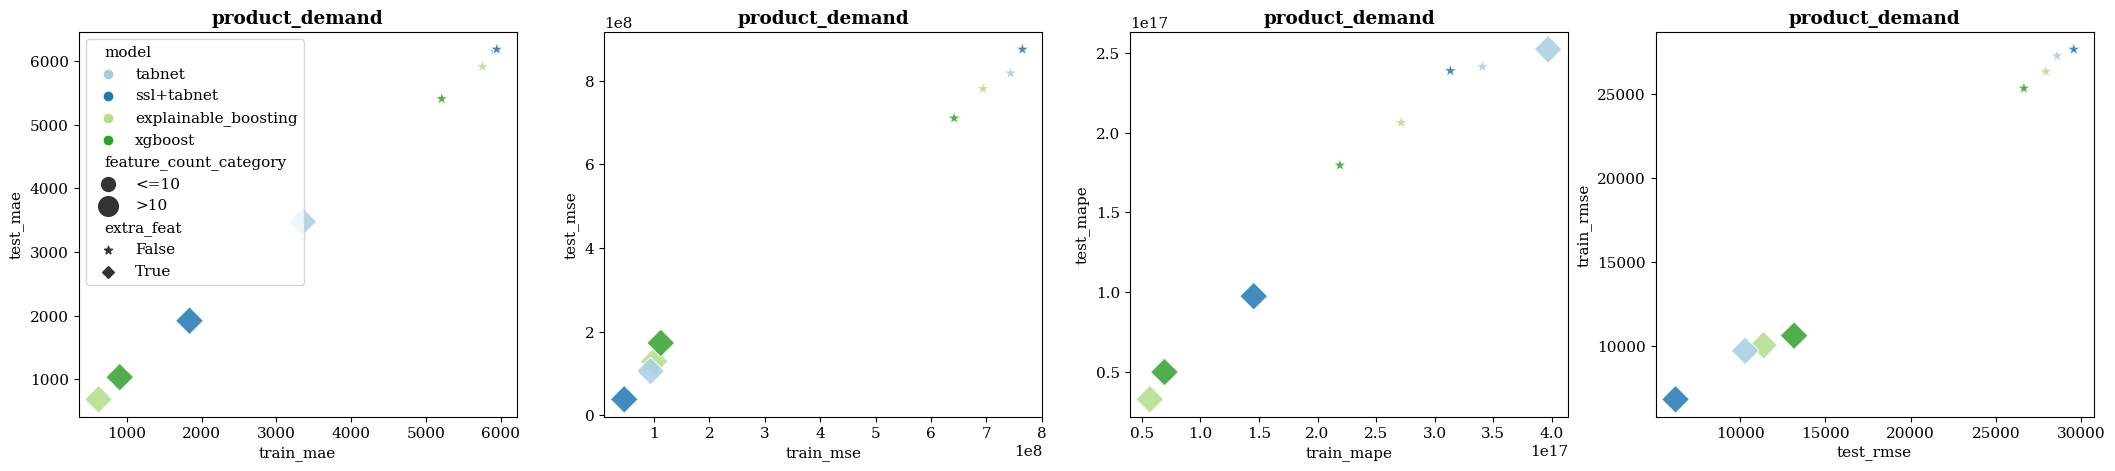

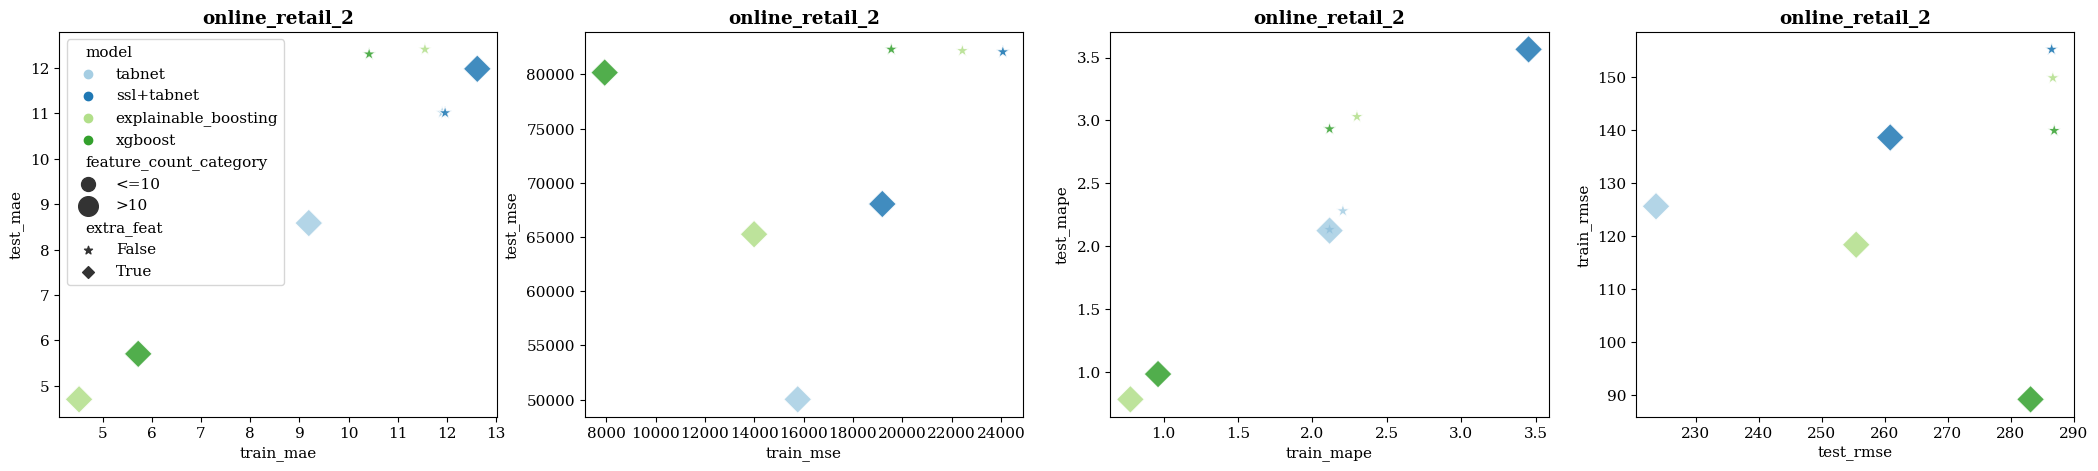

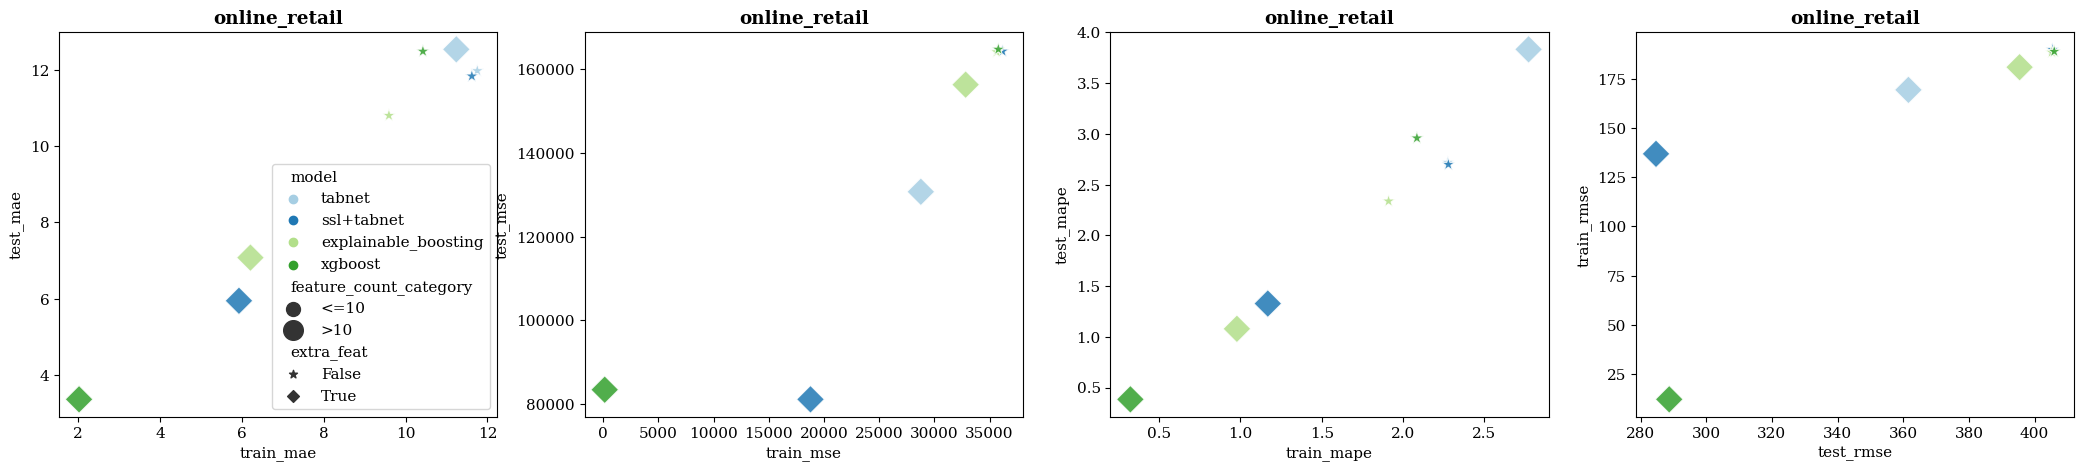

In [9]:
n_plots = len(datasets)*len(metrics_pair)
n_cols = 4
n_rows = n_plots // 4

# markers = {'tabnet':'T', 'ssl+tabnet':'+', 'explainable_boosting':'.', 'xgboost':'x'}
markers = {True:'D', False:'*'}
for dataset in datasets:
    idx = 1
    plt.figure(figsize=(26, 5))
    for y,x in metrics_pair:
        ax = plt.subplot(1, 4, idx)
        ax.set_title("%s"%dataset, fontdict=dict(fontweight="bold"))
        g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category", 
                            sizes=[100, 200],alpha=.85,markers=markers,palette="Paired",
                            ax = ax, legend=("auto" if idx==1 else None))
        idx += 1
    plt.savefig(f"{path}/result/{dataset}-scatter.png")
    plt.show()

/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/966997674.py:13: UserWarning: The sizes list has more values (2) than needed (1), which may not be intended.
  g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category",
/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/966997674.py:13: UserWarning: The sizes list has more values (2) than needed (1), which may not be intended.
  g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category",
/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/966997674.py:13: UserWarning: The sizes list has more values (2) than needed (1), which may not be intended.
  g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category",
/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/966997674.py:13: UserWarning

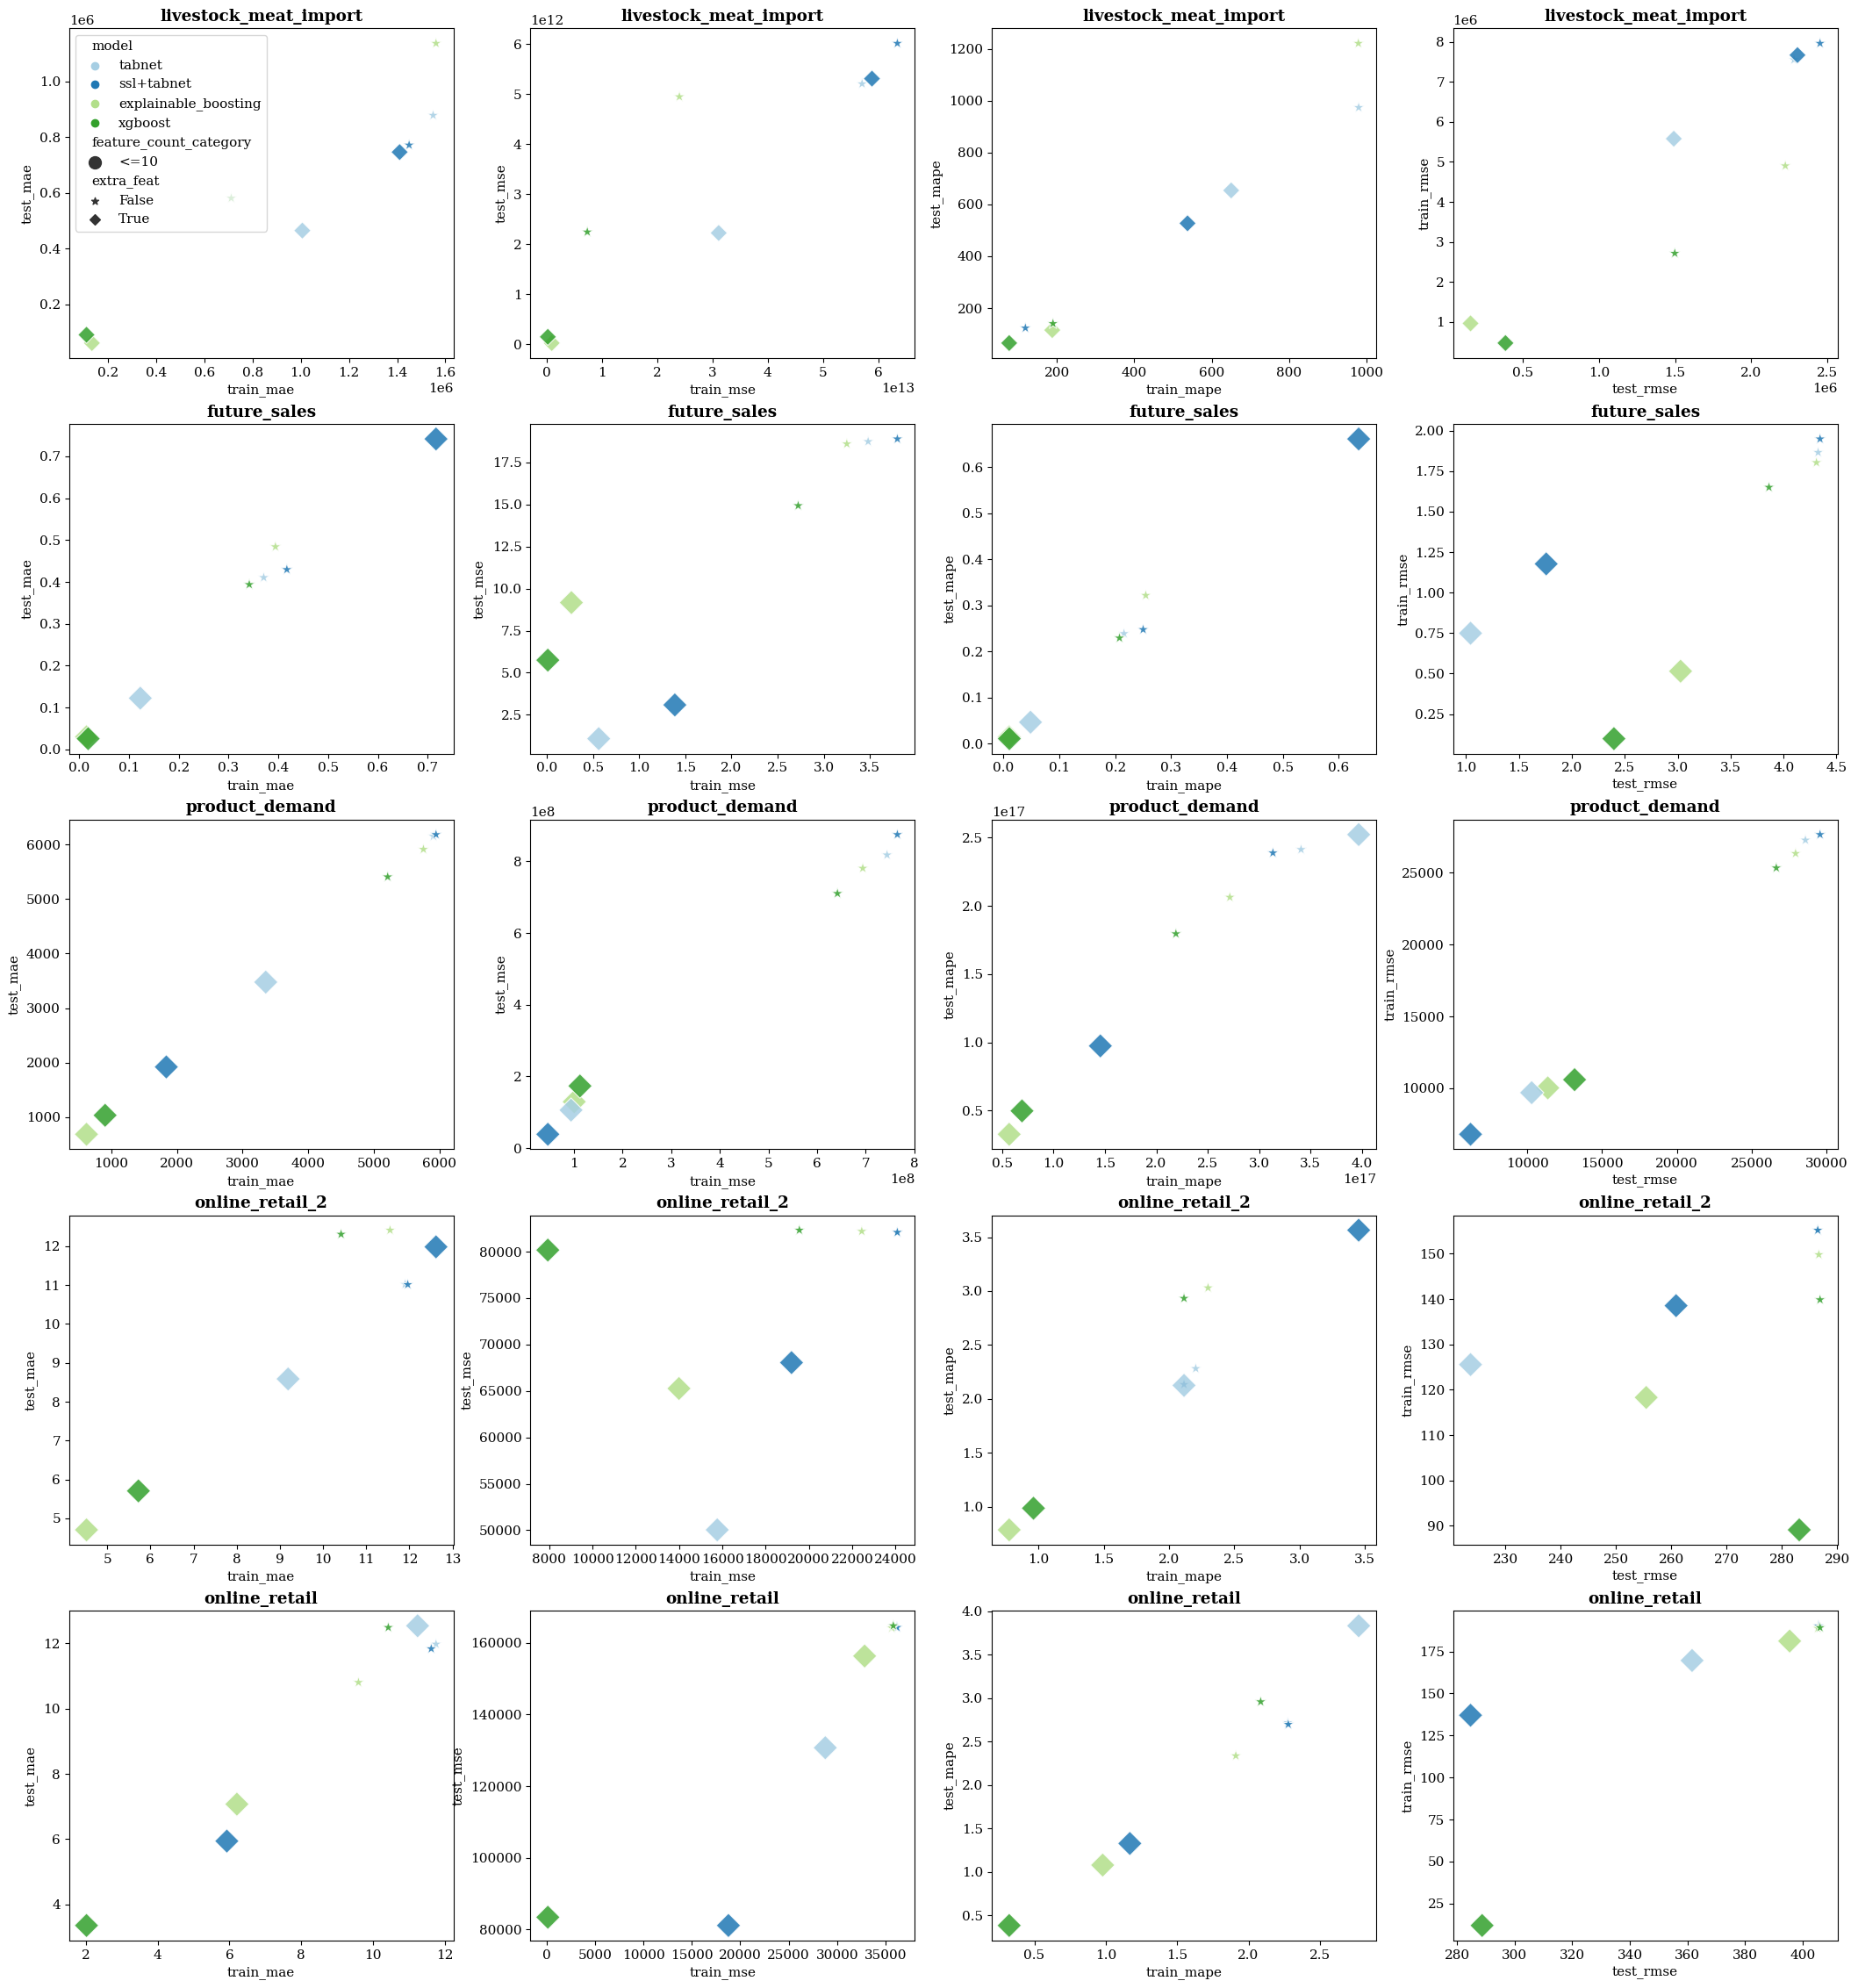

In [10]:
n_plots = len(datasets)*len(metrics_pair)
n_cols = 4
n_rows = n_plots // 4

# markers = {'tabnet':'T', 'ssl+tabnet':'+', 'explainable_boosting':'.', 'xgboost':'x'}
markers = {True:'D', False:'*'}
idx = 1
plt.figure(figsize=(26, 40))
for dataset in datasets:
    for y,x in metrics_pair:
        ax = plt.subplot(n_rows+2, n_cols, idx)
        ax.set_title("%s"%dataset, fontdict=dict(fontweight="bold"))
        g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category", 
                            sizes=[100, 200],alpha=.85,markers=markers,palette="Paired",
                            ax = ax, legend=("auto" if idx==1 else None))
        idx += 1
    # plt.savefig(f"{path}/result/{dataset}-scatter.png")
plt.savefig(f"{path}/result/all-scatter.png")
plt.show()

- mae: LMI error huge across all models
- mse: LMI error huge across all models
- rmse: LMI error huge across all models
- all models: MAE, MSE, RMSE is high for LMI dataset
- all models: MAPE error is high for PD dataset
- all models: performed poorly for LMI dataset

 # fc - feature count

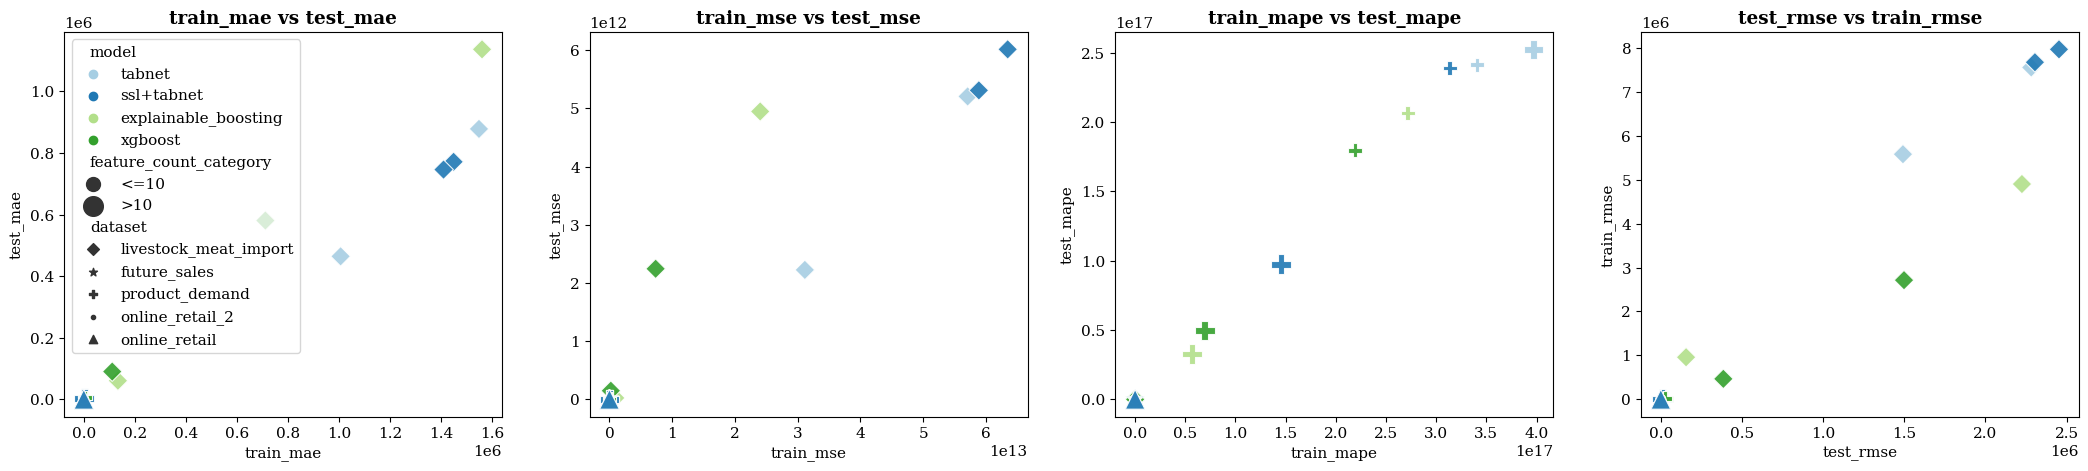

In [11]:
n_plots = len(datasets)*len(metrics_pair)
n_cols = 4
n_rows = n_plots // 4

# markers = {'tabnet':'T', 'ssl+tabnet':'+', 'explainable_boosting':'.', 'xgboost':'x'}
# markers = {True:'D', False:'*'}
markers = {'livestock_meat_import':'D', 'future_sales':'*', 'product_demand':'P',
       'online_retail_2':'.', 'online_retail':'^'}

# for dataset in datasets:
idx = 1
plt.figure(figsize=(26, 5))
for y,x in metrics_pair:
    ax = plt.subplot(1, 4, idx)
    ax.set_title(f"{x} vs {y}", fontdict=dict(fontweight="bold"))
    g = sns.scatterplot(data=df, x=x, y=y, hue="model", style="dataset", size="feature_count_category", 
                        sizes=[100, 200],alpha=.9,markers=markers,palette="Paired",
                        ax = ax, legend=("auto" if idx==1 else None))
    idx += 1
plt.savefig(f"{path}/result/{x}-{y}-fc-scatter.png") # fc - feature count
plt.show()

In [12]:
df["train_size"].value_counts()

train_size
189732     8
2348679    8
829868     8
659491     8
325463     8
Name: count, dtype: int64

In [13]:
df["train_size_category"] = df["train_size"].apply(lambda x: "100K-500K" if x <= 500_000 else ("500K-1M" if x <= 1_000_000 else "2M"))
df.head()

,Duration,Duration Seconds,dataset,extra_feat,feature_count,model,total size,test_size,time_period_sec_txt,time_period_test_txt,...,test_mae,test_mape,test_mse,test_rmse,train_mae,train_mape,train_mse,train_rmse,feature_count_category,train_size_category
0,13.6min,816.0,livestock_meat_import,False,5,tabnet,237165,47433,12691 days 00:00:00,2495 days 00:00:00,...,878282.656787,9.736134e+02,5.206301e+12,2.281732e+06,1.549047e+06,9.802483e+02,5.708591e+13,7.555522e+06,<=10,100K-500K
1,11.4min,684.0,livestock_meat_import,False,5,ssl+tabnet,237165,47433,12691 days 00:00:00,2495 days 00:00:00,...,771421.501378,1.230842e+02,6.015429e+12,2.452637e+06,1.449515e+06,1.185925e+02,6.346991e+13,7.966800e+06,<=10,100K-500K
2,42.1min,2526.0,future_sales,False,7,tabnet,2935849,587170,1033 days 00:00:00,298 days 00:00:00,...,0.410407,2.389662e-01,1.872326e+01,4.327038e+00,3.706080e-01,2.156763e-01,3.481449e+00,1.865864e+00,<=10,2M
3,2.6h,9360.0,future_sales,False,7,ssl+tabnet,2935849,587170,1033 days 00:00:00,298 days 00:00:00,...,0.429454,2.477705e-01,1.887979e+01,4.345088e+00,4.170997e-01,2.499798e-01,3.798161e+00,1.948887e+00,<=10,2M
4,26.6min,1596.0,product_demand,False,7,tabnet,1037336,207468,2193 days 00:00:00,410 days 00:00:00,...,6150.640694,2.413361e+17,8.178646e+08,2.859833e+04,5.908238e+03,3.407598e+17,7.440833e+08,2.727789e+04,<=10,500K-1M


# ts-train size

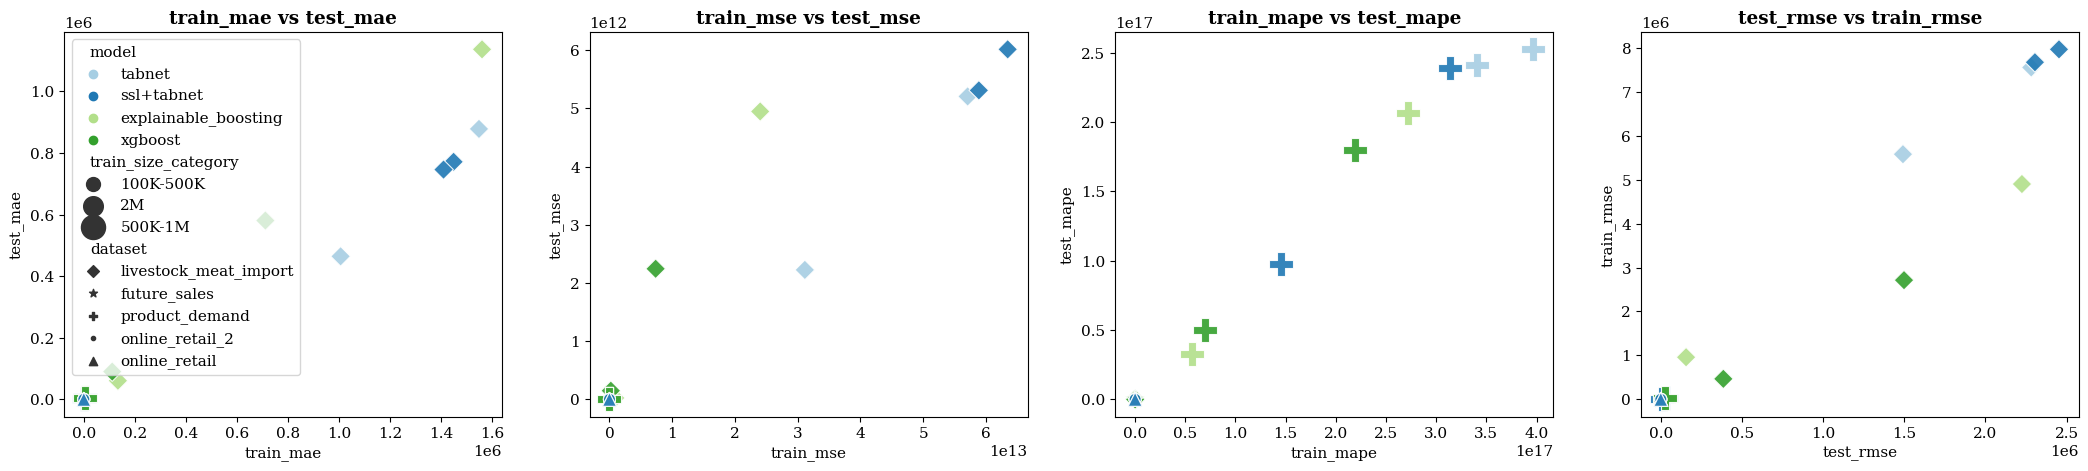

In [14]:
n_plots = len(datasets)*len(metrics_pair)
n_cols = 4
n_rows = n_plots // 4

# markers = {'tabnet':'T', 'ssl+tabnet':'+', 'explainable_boosting':'.', 'xgboost':'x'}
# markers = {True:'D', False:'*'}
markers = {'livestock_meat_import':'D', 'future_sales':'*', 'product_demand':'P',
       'online_retail_2':'.', 'online_retail':'^'}

# for dataset in datasets:
idx = 1
plt.figure(figsize=(26, 5))
for y,x in metrics_pair:
    ax = plt.subplot(1, 4, idx)
    ax.set_title(f"{x} vs {y}", fontdict=dict(fontweight="bold"))
    g = sns.scatterplot(data=df, x=x, y=y, hue="model", style="dataset", size="train_size_category", 
                        sizes=[100, 200, 300],alpha=.9,markers=markers,palette="Paired",
                        ax = ax, legend=("brief" if idx==1 else None))
    idx += 1
plt.savefig(f"{path}/result/{x}-{y}-ts-scatter.png")# ts-train size
plt.show()